In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy.stats import linregress
from scipy.stats import pearsonr

In [22]:
#Read the CSV file
file = os.path.join(".", "Data Used", "BYAREA.csv")
data = pd.read_csv(file)

#remove random cities/regions, returning only whole states:
data = data.loc[(data["AREA"] == "Alabama") | (data["AREA"] == "Alaska") | (data["AREA"] == "Arizona") | (data["AREA"] == "Arkansas")
                 | (data["AREA"] == "California") | (data["AREA"] == "Colorado") | (data["AREA"] == "Connecticut") | (data["AREA"] == "Delaware")
                 | (data["AREA"] == "District of Columbia") | (data["AREA"] == "Florida") | (data["AREA"] == "Georgia") | (data["AREA"] == "Hawaii")
                | (data["AREA"] == "Idaho") | (data["AREA"] == "Illinois") | (data["AREA"] == "Indiana") | (data["AREA"] == "Iowa")
                 | (data["AREA"] == "Kansas") | (data["AREA"] == "Kentucky") | (data["AREA"] == "Louisiana") | (data["AREA"] == "Maine") | (data["AREA"] == "Maryland")
                 | (data["AREA"] == "Massachusetts") | (data["AREA"] == "Michigan") | (data["AREA"] == "Minnesota") | (data["AREA"] == "Mississippi")
                 | (data["AREA"] == "Missouri") | (data["AREA"] == "Montana") | (data["AREA"] == "Nebraska") | (data["AREA"] == "Nevada") | (data["AREA"] == "New Hampshire")
                 | (data["AREA"] == "New Jersey") | (data["AREA"] == "New Mexico") | (data["AREA"] == "New York") | (data["AREA"] == "North Carolina") | (data["AREA"] == "North Dakota")
                 | (data["AREA"] == "Ohio") | (data["AREA"] == "Oklahoma") | (data["AREA"] == "Oregon") | (data["AREA"] == "Pennsylvania") | (data["AREA"] == "Rhode Island")
                 | (data["AREA"] == "South Carolina") | (data["AREA"] == "South Dakota") | (data["AREA"] == "Tennessee") | (data["AREA"] == "Texas") | (data["AREA"] == "Utah")
                 | (data["AREA"] == "Vermont") | (data["AREA"] == "Virginia") | (data["AREA"] == "Washington") | (data["AREA"] == "West Virginia") | (data["AREA"] == "Wisconsin")
                 | (data["AREA"] == "Wyoming")]

#remove this single year parameter from years
data = data[(data["YEAR"] != "2010-2014")]


In [23]:
data.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.1,9299,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,361.8,376.8,369.2,9467,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,402.9,419.5,411.1
3,Alabama,160.8,170.6,165.7,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.6,392.8,385.1,9969,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.2,440.2,431.7


In [4]:
file2 = os.path.join(".", "Data Used", "Nutrition__Physical_Obesity.csv")
data1 = pd.read_csv(file2)
data1.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [5]:
#dropping unnecessary labels:
data = data1.drop(labels = ['YearStart','Datasource','Class', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Low_Confidence_Limit', 'High_Confidence_Limit ', 
                           'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
                          'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategoryId1', 'StratificationID1'] ,axis = 1)

data= data.rename(columns={"LocationDesc":"AREA", "YearEnd": "YEAR", "Data_Value_Alt" : "% of Population"})

data.head()

,YEAR,LocationAbbr,AREA,Topic,Question,% of Population,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,Total,Total
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,Gender,Male
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,Gender,Female
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,Education,Less than high school
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,Education,High school graduate


In [6]:
#Cleaning the data and leaving only the 50 US states
data3 = data.loc[(data["AREA"] == "Alabama") | (data["AREA"] == "Alaska") | (data["AREA"] == "Arizona") | (data["AREA"] == "Arkansas")
                 | (data["AREA"] == "California") | (data["AREA"] == "Colorado") | (data["AREA"] == "Connecticut") | (data["AREA"] == "Delaware")
                 | (data["AREA"] == "District of Columbia") | (data["AREA"] == "Florida") | (data["AREA"] == "Georgia") | (data["AREA"] == "Hawaii")
                | (data["AREA"] == "Idaho") | (data["AREA"] == "Illinois") | (data["AREA"] == "Indiana") | (data["AREA"] == "Iowa")
                 | (data["AREA"] == "Kansas") | (data["AREA"] == "Kentucky") | (data["AREA"] == "Louisiana") | (data["AREA"] == "Maine") | (data["AREA"] == "Maryland")
                 | (data["AREA"] == "Massachusetts") | (data["AREA"] == "Michigan") | (data["AREA"] == "Minnesota") | (data["AREA"] == "Mississippi")
                 | (data["AREA"] == "Missouri") | (data["AREA"] == "Montana") | (data["AREA"] == "Nebraska") | (data["AREA"] == "Nevada") | (data["AREA"] == "New Hampshire")
                 | (data["AREA"] == "New Jersey") | (data["AREA"] == "New Mexico") | (data["AREA"] == "New York") | (data["AREA"] == "North Carolina") | (data["AREA"] == "North Dakota")
                 | (data["AREA"] == "Ohio") | (data["AREA"] == "Oklahoma") | (data["AREA"] == "Oregon") | (data["AREA"] == "Pennsylvania") | (data["AREA"] == "Rhode Island")
                 | (data["AREA"] == "South Carolina") | (data["AREA"] == "South Dakota") | (data["AREA"] == "Tennessee") | (data["AREA"] == "Texas") | (data["AREA"] == "Utah")
                 | (data["AREA"] == "Vermont") | (data["AREA"] == "Virginia") | (data["AREA"] == "Washington") | (data["AREA"] == "West Virginia") | (data["AREA"] == "Wisconsin")
                 | (data["AREA"] == "Wyoming")]

data3.head()

,YEAR,LocationAbbr,AREA,Topic,Question,% of Population,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,Total,Total
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,Gender,Male
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,Gender,Female
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,Education,Less than high school
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,Education,High school graduate


In [7]:
#create dataframe that shows the %of Adults who are Obese and shows the total of all races, genders, income and education levels:
obesity_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Obesity / Weight Status") & (data3["Question"]=="Percent of adults aged 18 years and older who have obesity")]
obesity_data.head()

#Create a DataFrame of the Obesity of the total people, that is the mean of all the available years 
obesity_data.reset_index(inplace=True, drop = True)
obesity_df = pd.DataFrame(obesity_data.groupby(["AREA"]).mean())
obesity_df.reset_index(inplace = True,)
obesity_df.head()



,AREA,YEAR,% of Population
0,Alabama,2013.5,33.700000
1,Alaska,2013.5,28.733333
2,Arizona,2013.5,27.366667
3,Arkansas,2013.5,34.350000
4,California,2013.5,24.466667


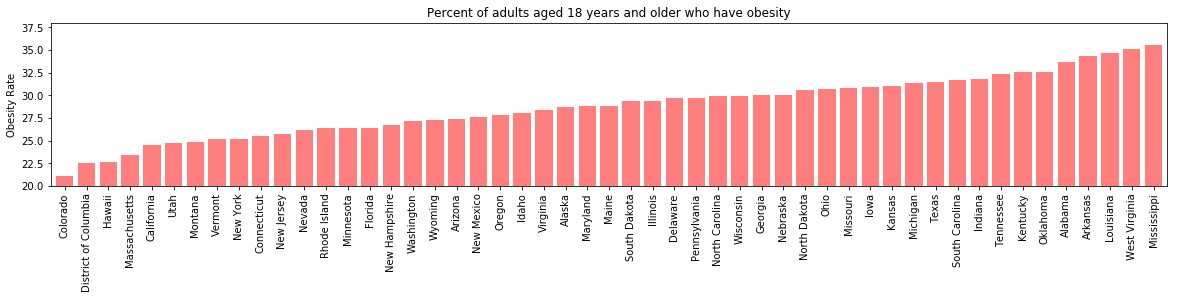

In [8]:
obesity_df.sort_values("% of Population", ascending = True, inplace = True)

x_axis = np.arange(len(obesity_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, obesity_df["AREA"], rotation="vertical")

plt.xlim(-0.25, len(x_axis))
#plt.ylim(0, max(obesity_df["% of Population"])+ 10)
plt.ylim(20, 38)
plt.title("Percent of adults aged 18 years and older who have obesity")
plt.ylabel("Obesity Rate")

avg_state_obesity = plt.bar(x_axis, obesity_df["% of Population"], alpha = .5, color = "r", align="edge")
plt.savefig("avg_state_obesity.png")
plt.show()

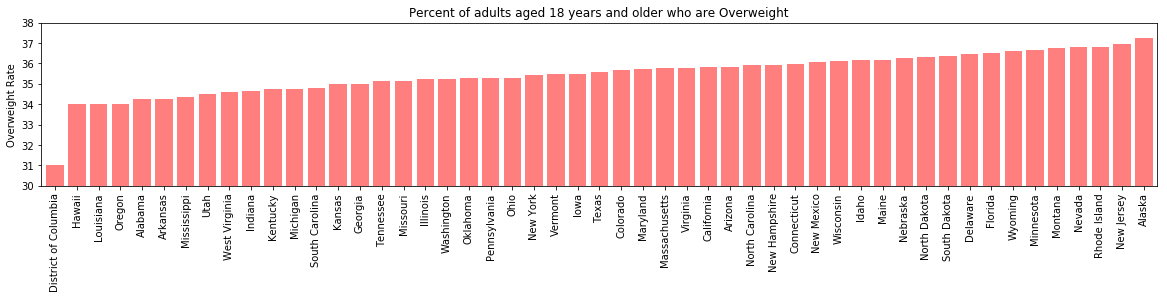

In [9]:
#Create dataframe that shows the % of Adults who are Overweight and shows the total of all races, genders, income and education levels:
overweight_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Obesity / Weight Status") & (data3["Question"]=="Percent of adults aged 18 years and older who have an overweight classification")]
#Create a DataFrame of the Obesity of the total people, that is the mean of all the available years 
overweight_data.reset_index(inplace=True, drop = True)
overweight_df = pd.DataFrame(overweight_data.groupby(["AREA"]).mean())
overweight_df.reset_index(inplace = True,)
# Plot the Overweight Totals
overweight_df.sort_values("% of Population", ascending = True, inplace = True)
x_axis = np.arange(len(overweight_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize = (20,3))
plt.xticks(tick_locations, overweight_df["AREA"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(30, 38)
plt.title("Percent of adults aged 18 years and older who are Overweight")
plt.ylabel("Overweight Rate")
avg_state_overweight = plt.bar(x_axis, overweight_df["% of Population"], alpha = .5, color = "r", align="edge")
plt.savefig("avg_state_overweight.png")
plt.show()

In [10]:
exercise_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Physical Activity - Behavior") & (data3["Question"]=="Percent of adults who engage in no leisure-time physical activity")]
exercise_data.head()

,YEAR,LocationAbbr,AREA,Topic,Question,% of Population,StratificationCategory1,Stratification1
2266,2013,MS,Mississippi,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,38.1,Total,Total
2831,2013,TN,Tennessee,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,37.2,Total,Total
2938,2015,MS,Mississippi,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,36.8,Total,Total
3549,2011,MS,Mississippi,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,36.0,Total,Total
4161,2011,TN,Tennessee,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,35.1,Total,Total


In [11]:
exercise_df = pd.DataFrame(exercise_data.groupby(["AREA"]).mean())
exercise_df.reset_index(inplace = True)
exercise_df.head()

,AREA,YEAR,% of Population
0,Alabama,2013.5,30.033333
1,Alaska,2013.5,20.516667
2,Arizona,2013.5,23.483333
3,Arkansas,2013.5,32.366667
4,California,2013.5,20.316667


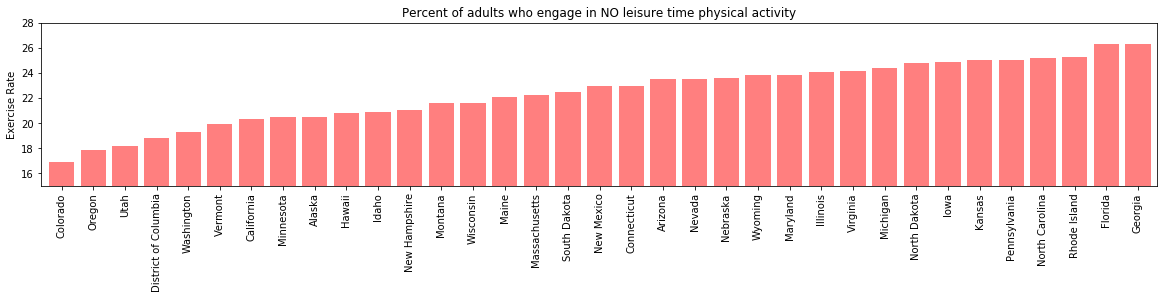

In [12]:
exercise_df.sort_values("% of Population", ascending = True, inplace = True)

x_axis = np.arange(len(exercise_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, exercise_df["AREA"], rotation="vertical")

plt.xlim(-0.25, 35)
plt.ylim(15, 28)

plt.title("Percent of adults who engage in NO leisure time physical activity")
plt.ylabel("Exercise Rate")

avg_state_exercise = plt.bar(x_axis, exercise_df["% of Population"], alpha = .5, color = "r", align="edge")
plt.savefig("avg_state_exercise.png")
plt.show()


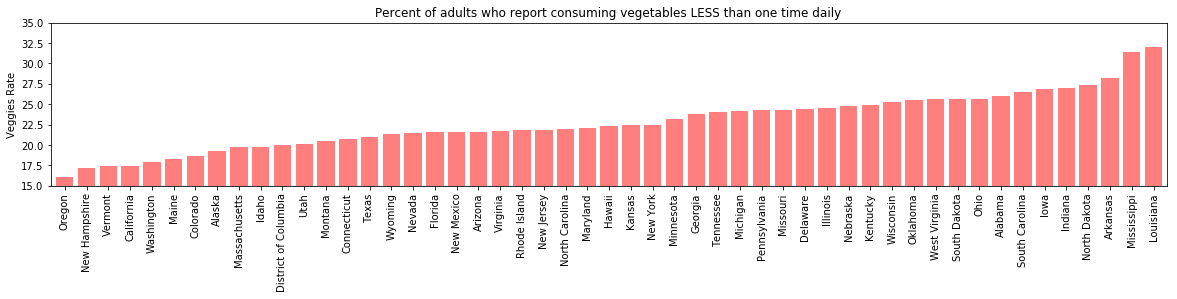

In [13]:
#Create dataframe that shows the % of Adults who consume at least one veggie per day and shows the total of all races, genders, income and education levels:
veggies_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Fruits and Vegetables - Behavior") & (data3["Question"]=="Percent of adults who report consuming vegetables less than one time daily")]
#Create a DataFrame of the Veggies consumption of the total people, that is the mean of all the available years 
veggies_df = pd.DataFrame(veggies_data.groupby(["AREA"]).mean())
veggies_df.reset_index(inplace = True)
# Plot the Veggies Totals
veggies_df.sort_values("% of Population", ascending = True, inplace = True)
x_axis = np.arange(len(veggies_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize = (20,3))
plt.xticks(tick_locations, veggies_df["AREA"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(15, 35)
plt.title("Percent of adults who report consuming vegetables LESS than one time daily")
plt.ylabel("Veggies Rate")
avg_state_veggies = plt.bar(x_axis, veggies_df["% of Population"], alpha = .5, color = "r", align="edge")
plt.savefig("avg_state_veggies.png")
plt.show()

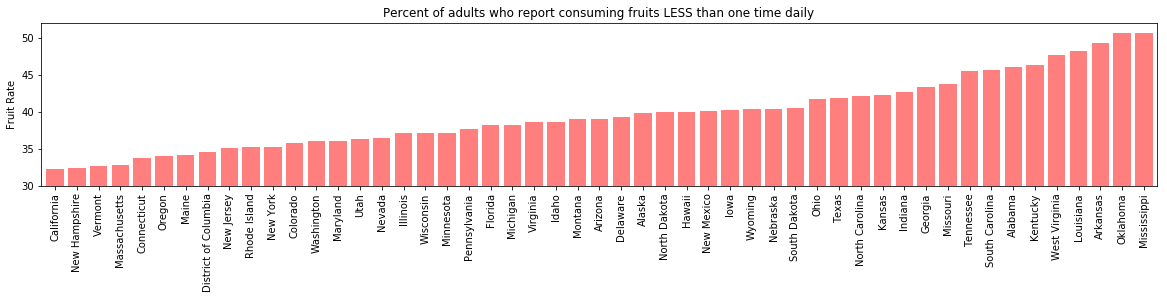

In [14]:
#Create dataframe that shows the % of Adults who consume at least one Fruit per day and shows the total of all races, genders, income and education levels:
fruit_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Fruits and Vegetables - Behavior") & (data3["Question"]=="Percent of adults who report consuming fruit less than one time daily")]
#Create a DataFrame of the Veggies consumption of the total people, that is the mean of all the available years 
fruit_df = pd.DataFrame(fruit_data.groupby(["AREA"]).mean())
fruit_df.reset_index(inplace = True)
# Plot the Veggies Totals
fruit_df.sort_values("% of Population", ascending = True, inplace = True)
x_axis = np.arange(len(fruit_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize = (20,3))
plt.xticks(tick_locations, fruit_df["AREA"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(30, 52)
plt.title("Percent of adults who report consuming fruits LESS than one time daily")
plt.ylabel("Fruit Rate")
avg_state_fruit = plt.bar(x_axis, fruit_df["% of Population"], alpha = .5, color = "r", align="edge")
plt.savefig("avg_state_fruit.png")
plt.show()


In [16]:
#Create dataframe that shows the % of Adults who are Overweight and shows the total of all races, genders, income and education levels:
physical_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Physical Activity - Behavior") & (data3["Question"]=="Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)")]

physical_data["% of Population"]= 100-(physical_data["% of Population"])

physical_data.head()


C:\Users\Poncho\Miniconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,YEAR,LocationAbbr,AREA,Topic,Question,% of Population,StratificationCategory1,Stratification1
10007,2013,TN,Tennessee,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,79.4,Total,Total
12351,2015,MS,Mississippi,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,78.1,Total,Total
12653,2013,MS,Mississippi,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,77.9,Total,Total
13718,2011,TN,Tennessee,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,77.3,Total,Total
15423,2011,MS,Mississippi,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,76.3,Total,Total


C:\Users\Poncho\Miniconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


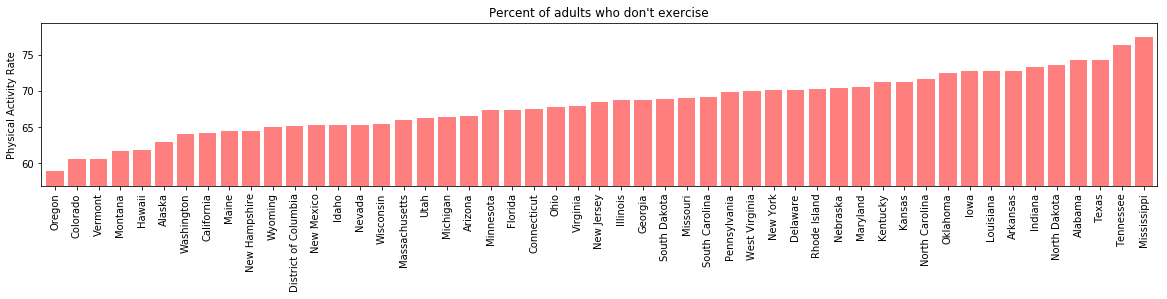

In [17]:
#Create dataframe that shows the % of Adults who are Overweight and shows the total of all races, genders, income and education levels:
physical_data = data3[(data3["Stratification1"]=="Total") & (data3["Topic"]=="Physical Activity - Behavior") & (data3["Question"]=="Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)")]
#Flip the values so that a low % means healthy to match the other metrics
physical_data["% of Population"]= 100-(physical_data["% of Population"])

#Create a DataFrame of the Obesity of the total people, that is the mean of all the available years 
physical_data.reset_index(inplace=True, drop = True)
physical_df = pd.DataFrame(physical_data.groupby(["AREA"]).mean())
physical_df.reset_index(inplace = True,)

# Plot the Overweight Totals
physical_df.sort_values("% of Population", ascending = True, inplace = True)
x_axis = np.arange(len(physical_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize = (20,3))
plt.xticks(tick_locations, physical_df["AREA"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(min(physical_df["% of Population"]) - 2, max(physical_df["% of Population"])+ 2)
plt.title("Percent of adults who don't exercise")
plt.ylabel("Physical Activity Rate")
avg_state_physical = plt.bar(x_axis, physical_df["% of Population"], alpha = .5, color = "r", align="edge")
plt.savefig("avg_state_physical.png")
plt.show()


In [46]:
veggies_df.reset_index(inplace = True, drop = True)
exercise_df.reset_index(inplace = True, drop = True)
obesity_df.reset_index(inplace = True, drop = True)
physical_df.reset_index(inplace = True, drop = True)
overweight_df.reset_index(inplace = True, drop = True)
fruit_df.reset_index(inplace = True, drop = True)

#health_list = [veggies_df, exercise_df, obesity_df, physical_df, overweight_df, fruit_df]
health_list = [veggies_df, obesity_df, physical_df, fruit_df]
health_scores_dict = []
for df in health_list:
    for index, row in df.iterrows():
        health_scores_dict.append({"Scores": index, "State": row["AREA"] })

health_scores_df = pd.DataFrame.from_dict(health_scores_dict)
health_scores_avg = pd.DataFrame(health_scores_df.groupby("State").mean())
health_scores_avg.reset_index(inplace = True)
health_scores_avg.sort_values("Scores", ascending = True, inplace = True)
health_scores_avg

,State,Scores
45,Vermont,3.25
4,California,3.50
5,Colorado,4.50
37,Oregon,6.25
29,New Hampshire,6.50
8,District of Columbia,7.25
21,Massachusetts,7.50
47,Washington,9.50
19,Maine,11.00
26,Montana,11.25


In [41]:
#create dataframe that is only a total of all races, genders and cancers:
all_data = data[(data["SITE"] == "All Cancer Sites Combined") & (data["RACE"] == "All Races") & (data["SEX"] == "Male and Female")]
all_data.reset_index(inplace = True)
all_data.drop(labels="index", axis = 1, inplace=True)
for index, row in all_data.iterrows():
    if row["COUNT"] == "~":
        all_data.drop(index, inplace = True)
        all_data.drop(index + 1, inplace = True)
all_data["COUNT"] = pd.to_numeric(all_data["COUNT"])
all_data["% of Population"] = (all_data["COUNT"]/all_data["POPULATION"])*100
#create two separate datasets for incidence and mortality 
all_pop_incidence_data = all_data.loc[all_data["EVENT_TYPE"] == "Incidence"]
all_pop_mortality_data = all_data.loc[all_data["EVENT_TYPE"] == "Mortality"]

#create new dataframes based on groupbys that give us the average of the % of population to have a 
#cancer incidence or mortality from 1999-2014
#creation of these dataframes is not neccessary to create the below combined dataframe with both 
#incidence and mortality data... but we can use them if we want
state_pop_incidences_df = pd.DataFrame(all_pop_incidence_data.groupby(["AREA"]).mean())
state_pop_incidences_df.reset_index(inplace = True)
state_pop_incidences_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

state_pop_mortality_df = pd.DataFrame(all_pop_mortality_data.groupby(["AREA"]).mean())
state_pop_mortality_df.reset_index(inplace = True)
state_pop_mortality_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

state_pop_incidence_mortality_combined_df = pd.DataFrame({"State": state_pop_incidences_df["AREA"], "Incidence %": state_pop_incidences_df["% of Population"],
                                                          "Mortality %": state_pop_mortality_df["% of Population"] })

#need to reset index so that when we do the below division of one column and another, the index values match 
all_pop_mortality_data.reset_index(inplace = True)
all_pop_mortality_data.drop(labels="index", axis = 1, inplace=True)

all_pop_incidence_data.reset_index(inplace = True)
all_pop_incidence_data.drop(labels = "index", axis = 1, inplace = True)

#creating dictionary to use for DataFrame about mortality rates
state_mortality_total_dict = {"State": all_pop_incidence_data["AREA"], 
                              "Mortality Rate": (all_pop_mortality_data["COUNT"]/all_pop_incidence_data["COUNT"])*100, 
                              "Year": all_pop_incidence_data["YEAR"]}

state_mortality_rate_df = pd.DataFrame.from_dict(state_mortality_total_dict)

#the above DataFrame will have mortality rate for every year for each state, the below groupby will allow us to 
#have the average of those for each state in a new DataFrame
average_state_mortality_df = pd.DataFrame(state_mortality_rate_df.groupby(["State"]).mean())
average_state_mortality_df.reset_index(inplace = True)




C:\Users\Poncho\Miniconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Poncho\Miniconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Poncho\Miniconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Poncho\Miniconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:9: SettingWithCop

In [42]:
state_pop_incidences_df.head()

,AREA,% of Population
0,Alabama,0.500521
1,Alaska,0.361334
2,Arizona,0.437163
3,Arkansas,0.516612
4,California,0.419539


In [25]:
average_state_mortality_df.head()

,State,Mortality Rate
0,Alabama,43.246826
1,Alaska,33.052162
2,Arizona,38.747238
3,Arkansas,43.563621
4,California,36.389487


In [43]:
combined_states1 = state_pop_incidences_df.merge(health_scores_avg, on= "State")
combined_states1.head()

KeyError: 'State'

In [39]:
combined_states = average_state_mortality_df.merge(health_scores_avg, on="State")
combined_states.head()

,State,Mortality Rate,Scores
0,Alabama,43.246826,38.000000
1,Alaska,33.052162,20.000000
2,Arizona,38.747238,21.833333
3,Arkansas,43.563621,40.166667
4,California,36.389487,8.333333


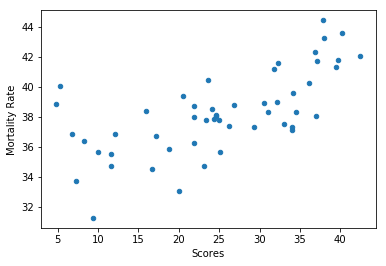

In [29]:
#plt.scatter(com["Mortality Rate"], health_scores_avg["Scores"], marker="o", facecolors="red", edgecolors="black", s=x_axis[::-1], alpha=0.75)

combined_states.plot.scatter("Scores", "Mortality Rate")
plt.savefig("cancervshealth.png")



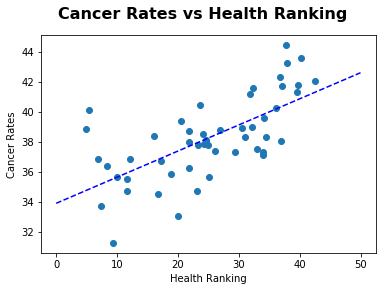

In [30]:
(slope, intercept, _, _, _) = linregress(combined_states["Scores"], combined_states["Mortality Rate"])
fit = slope * x_axis + intercept

slope_canvscore = slope

fig, ax = plt.subplots()

fig.suptitle("Cancer Rates vs Health Ranking", fontsize=16, fontweight="bold")
#ax.set_xlim(0, 100)
#ax.set_ylim(0, 100)

ax.set_xlabel("Health Ranking")
ax.set_ylabel("Cancer Rates")

ax.plot(combined_states["Scores"], combined_states["Mortality Rate"], linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
plt.savefig("cancervshealth_linregress.png")
plt.show()

In [31]:
slope_canvscore

0.17402455287185914

In [32]:
scipy.stats.pearsonr(combined_states["Scores"], combined_states["Mortality Rate"])

NameError: name 'scipy' is not defined